Chapter 8
# 绘制网格
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [1]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

In [2]:
colormap = cm.get_cmap("rainbow")

def plot_grid(
    xmin: float,
    xmax: float,
    ymin: float,
    ymax: float,
    n_lines: int,
    line_points: int,
    map_func,
):

    lines = []

    # 水平线
    for y in np.linspace(ymin, ymax, n_lines):
        lines.append([map_func(x, y) for x in np.linspace(xmin, xmax, line_points)])

    # 竖直线
    for x in np.linspace(xmin, xmax, n_lines):
        lines.append([map_func(x, y) for y in np.linspace(ymin, ymax, line_points)])

    # 绘制所有线条
    for i, line in enumerate(lines):
        
        p = i / (len(lines) - 1)  
        xs, ys = zip(*line)
        # 利用颜色映射
        plt.plot(xs, ys, color=colormap(p))

## 各种映射

In [9]:
def identity(x, y):
    return x, y

def rotate_scale(x, y):
    return x + y, x - y

def shear(x, y):
    return x, x + y

def exp(x, y):
    return math.exp(x), math.exp(y)

def complex_sq(x, y):
    c = complex(x, y) ** 2
    return (c.real, c.imag)

def sin_cos(x: float, y: float):
    return x + math.sin(y * 2) * 0.2, y + math.cos(x * 2) * 0.3

def vortex(x: float, y: float):
    dst = (x - 2) ** 2 + (y - 2) ** 2
    ang = math.atan2(y - 2, x - 2)
    return math.cos(ang - dst * 0.1) * dst, math.sin(ang - dst * 0.1) * dst

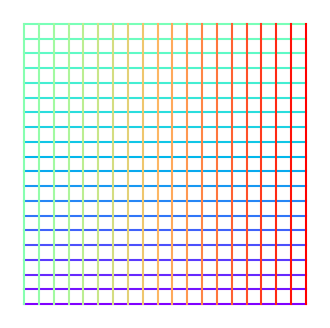

In [6]:
fig = plt.figure(figsize=(4, 4))

# 原图
ax = fig.add_subplot(111)
plot_grid(0, 5, 0, 5, 20, 20, identity)

ax.axis('off')

fig.savefig('Figures/原始网格.svg', format='svg')

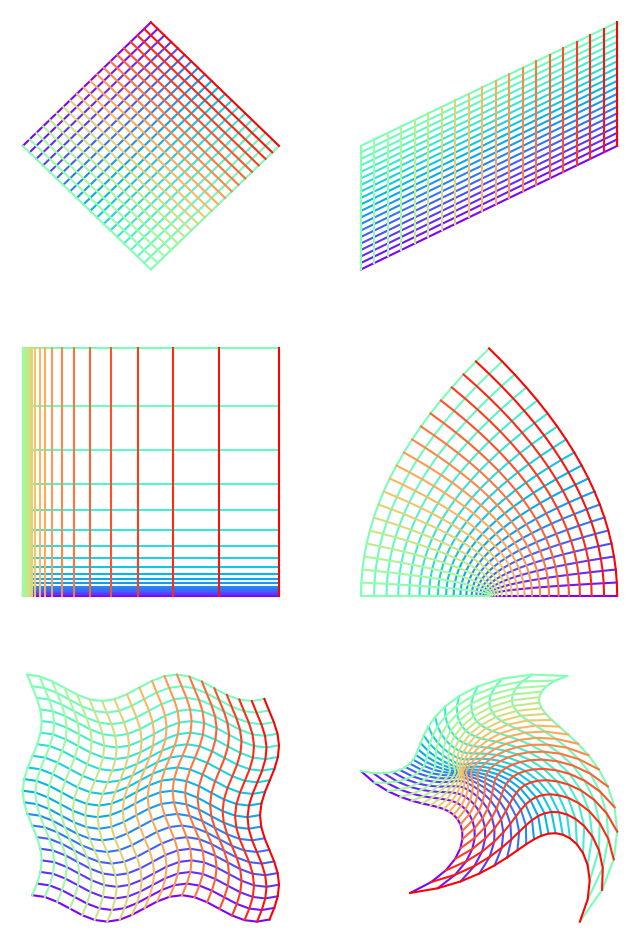

In [11]:
fig = plt.figure(figsize=(8, 12))

ax = fig.add_subplot(3, 2, 1)
plot_grid(0, 5, 0, 5, 20, 20, rotate_scale)
ax.axis('off')

ax = fig.add_subplot(3, 2, 2)
plot_grid(0, 5, 0, 5, 20, 20, shear)
ax.axis('off')

ax = fig.add_subplot(3, 2, 3)
plot_grid(0, 5, 0, 5, 20, 20, exp)
ax.axis('off')

ax = fig.add_subplot(3, 2, 4)
plot_grid(0, 5, 0, 5, 20, 20, complex_sq)
ax.axis('off')

ax = fig.add_subplot(3, 2, 5)
plot_grid(0, 5, 0, 5, 20, 20, sin_cos)
ax.axis('off')

ax = fig.add_subplot(3, 2, 6)
plot_grid(0, 5, 0, 5, 20, 20, vortex)
ax.axis('off')

fig.savefig('Figures/线性、非线性变换.svg', format='svg')

参考：  
https://stackoverflow.com/questions/71735261/how-can-i-show-transformation-of-coordinate-grid-lines-in-python  
https://math.stackexchange.com/questions/4679753/graphically-showing-that-integration-is-a-linear-transformation